In [1]:
from gsw import *

C:\Users\Ga Bo\Desktop\Master Thesis\GSWalk\gsw.py:272: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  u1=np.linalg.lstsq(B_t,-B[:,p])[0]
C:\Users\Ga Bo\Desktop\Master Thesis\GSWalk\gsw.py:276: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  u1=np.linalg.lstsq(B_t,-B[:,p])[0]


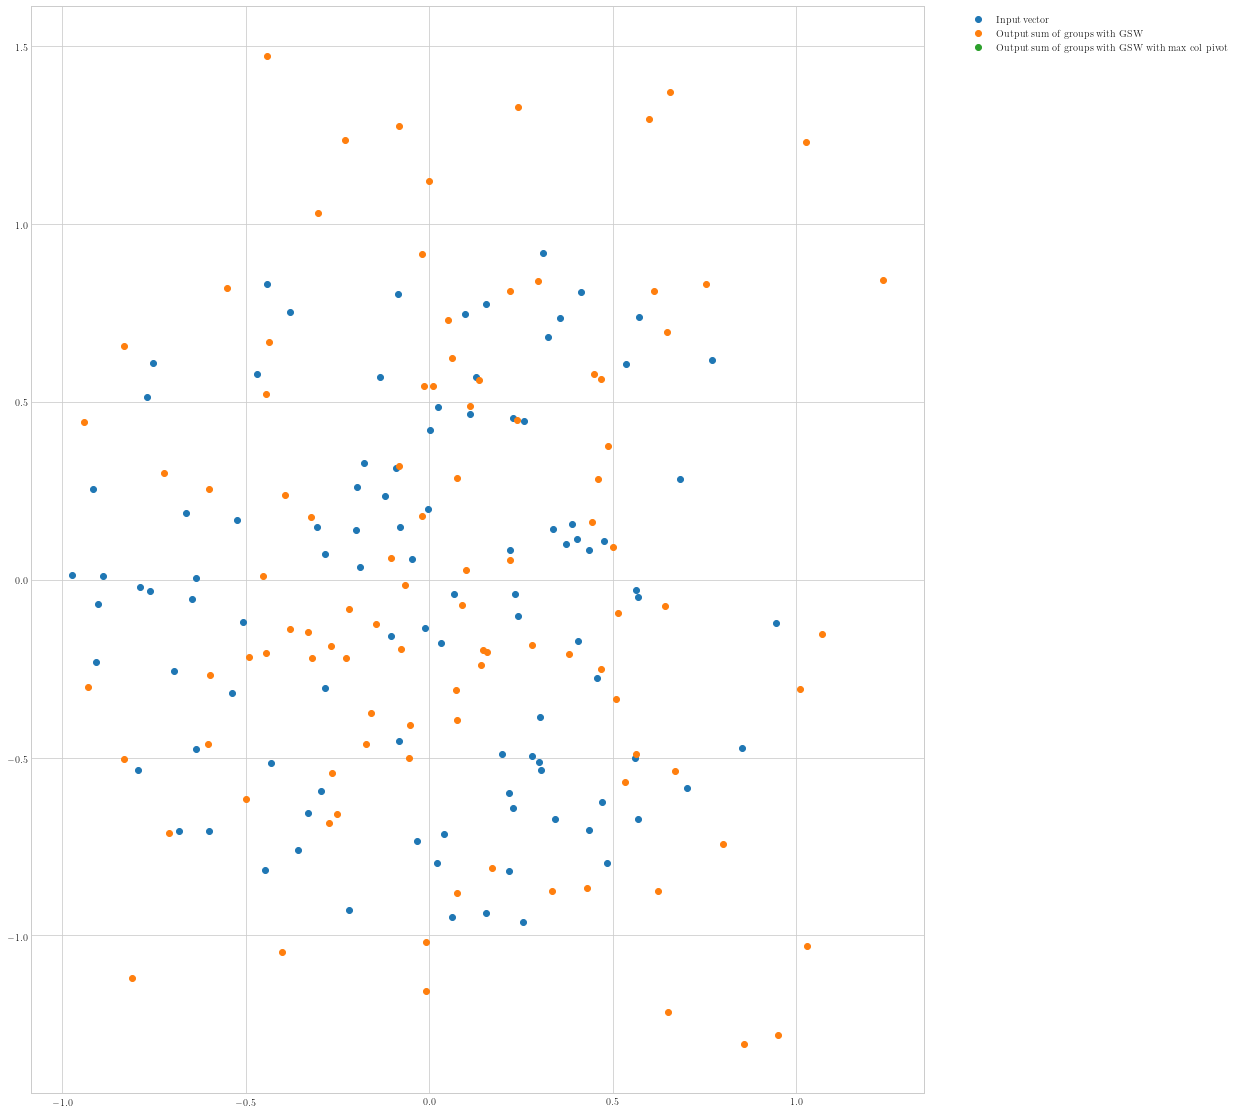

In [2]:
#test to see if it's the same as below
n=100
v=sample_from_sphere(n)
v=sample_from_ball(n,d=2)
#print(f'v:{v}')
plt.plot([e[0] for e in v],[e[1] for e in v],'o',label='Input vector')
B=np.transpose(np.vstack(tuple([e for e in v])))
gsw_xs=[]
gsw_coloring_xs=[]
for i in range(100):
    #print(i)
    gsw_xs.append(gram_schmidt_walk(v,np.zeros(n),plot=False,debug=False,flag_issue=True))
plt.plot([np.matmul(B,x)[0] for x in gsw_xs],[np.matmul(B,x)[1] for x in gsw_xs],'o',label='Output sum of groups with GSW')
plt.plot([np.matmul(B,x)[0] for x in gsw_coloring_xs],[np.matmul(B,x)[1] for x in gsw_coloring_xs],'o',label='Output sum of groups with GSW with max col pivot')
plt.legend()
plt.legend(bbox_to_anchor=(1.35, 1))

[]


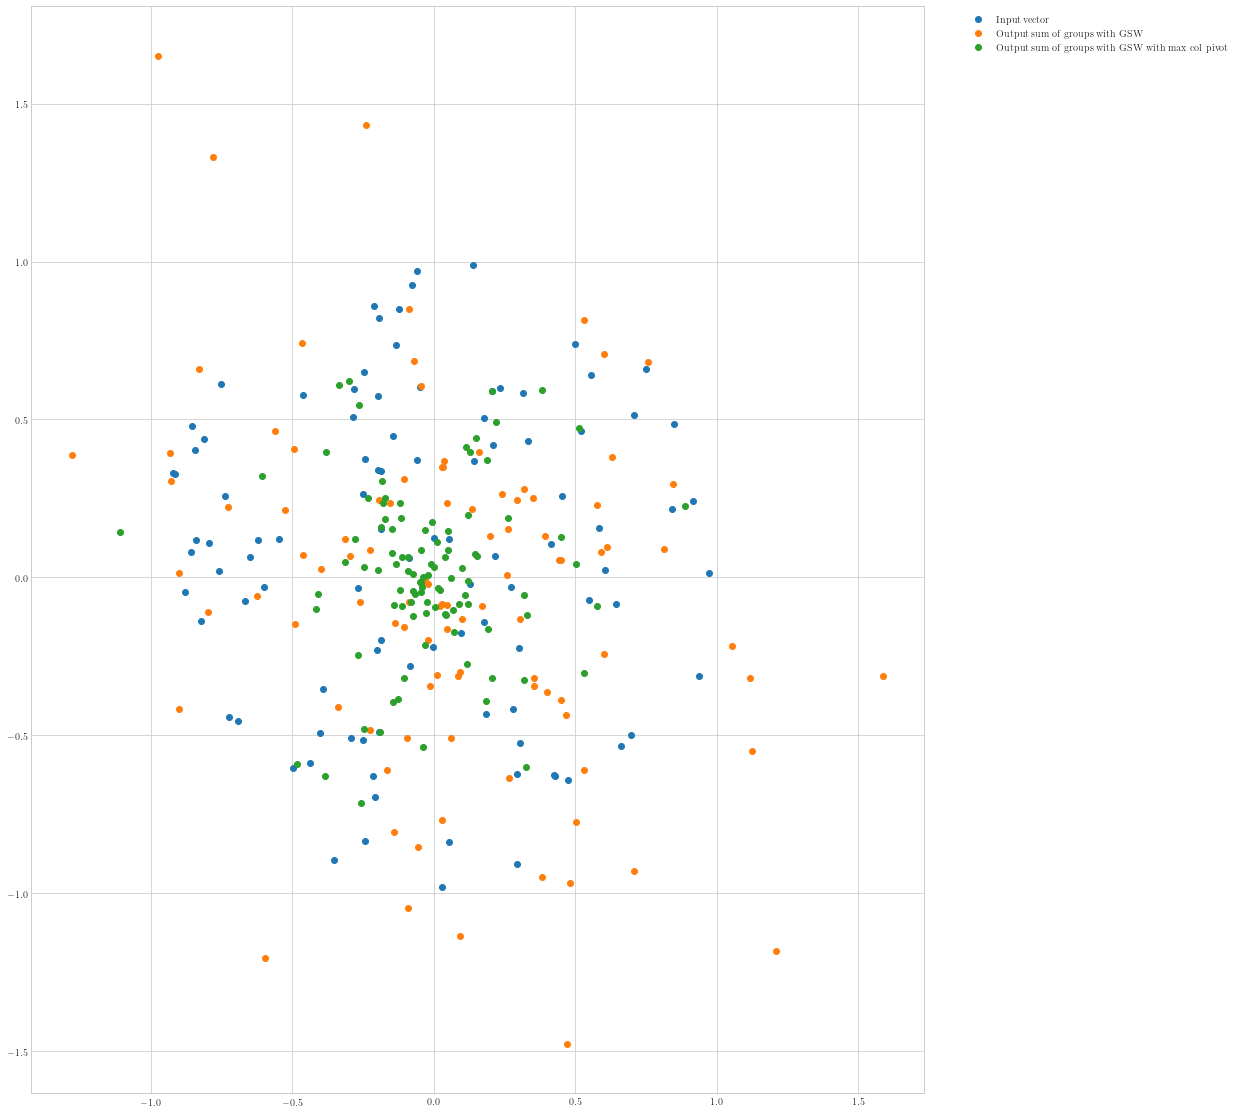

In [3]:
#original
n=100
v=sample_from_sphere(n)
v=sample_from_ball(n,d=2)
#print(f'v:{v}')
plt.plot([e[0] for e in v],[e[1] for e in v],'o',label='Input vector')
B=np.transpose(np.vstack(tuple([e for e in v])))
gsw_xs=[]
gsw_coloring_xs=[]
for i in range(100):
    #print(i)
    gsw_xs.append(gram_schmidt_walk(v,np.zeros(n),plot=False,debug=False))
    gsw_coloring_xs.append(gram_schmidt_walk(v,np.zeros(n),plot=False,debug=False,mode='max_coloring'))
plt.plot([np.matmul(B,x)[0] for x in gsw_xs],[np.matmul(B,x)[1] for x in gsw_xs],'o',label='Output sum of groups with GSW')
plt.plot([np.matmul(B,x)[0] for x in gsw_coloring_xs],[np.matmul(B,x)[1] for x in gsw_coloring_xs],'o',label='Output sum of groups with GSW with max col pivot')
plt.legend()
plt.legend(bbox_to_anchor=(1.35, 1))
tikzplotlib.save(f"max_col_comparison.tex")
counts = [x for x in list(zip(*np.unique(gsw_xs, return_counts = True, axis = 0))) if x[1]>1]
print(counts)

[]


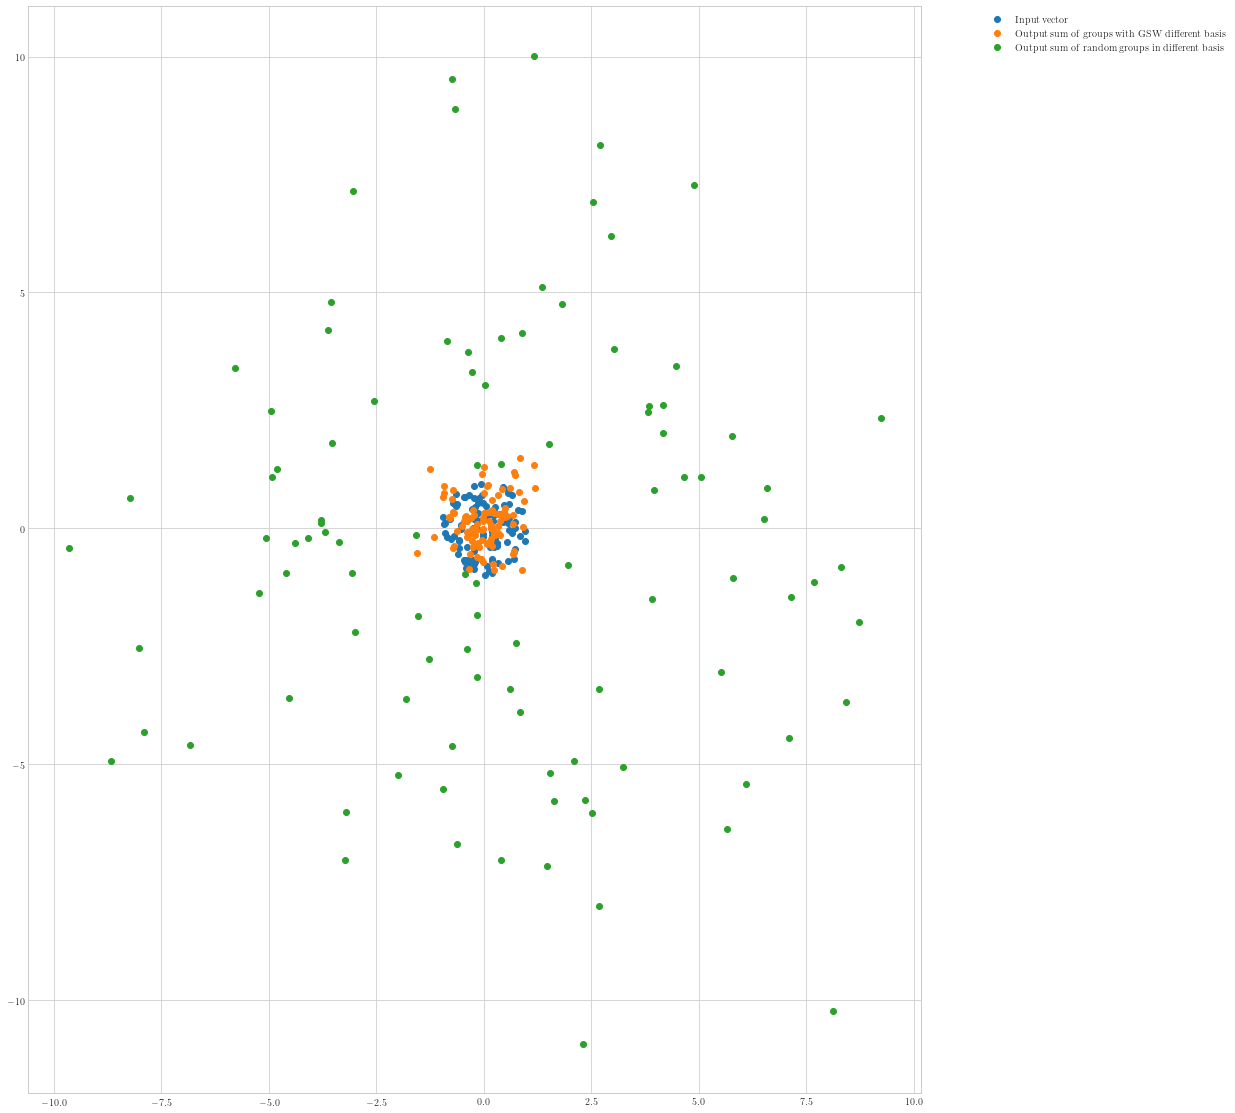

In [3]:
## Trying with a random orthonormal basis (A Gram-Schmidt orthogonalization of a random basis)
n=100
x=np.random.uniform(size=(n,n))
basis=gram_schmidt_columns(x)
v=sample_from_ball(n,d=2)
B=np.transpose(np.vstack(tuple([e for e in v])))
#v=np.transpose(np.matmul(np.transpose(np.vstack(tuple([e for e in basis]))),np.vstack(tuple([e for e in v]))))#is v already a list ? If so we can simplify syntax here
#v=[v[:,i] for i in range(v.shape[1])]
#B=np.transpose(np.vstack(tuple([e for e in v])))

#print(f'v:{v}')
plt.plot([e[0] for e in v],[e[1] for e in v],'o',label='Input vector')
a,b=-np.ones(n),np.ones(n)
gsw_xs=[]
rand_xs=[]
for i in range(n):
    rand_xs.append(change_basis(2*np.random.randint(2,size=n)-1,basis,orthonormal_basis(n)))
    gsw_xs.append(gram_schmidt_walk(v,np.zeros(n),a,b,False,False,False,basis))
plt.plot([np.matmul(B,x)[0] for x in gsw_xs],[np.matmul(B,x)[1] for x in gsw_xs],'o',label='Output sum of groups with GSW different basis')
plt.plot([np.matmul(B,x)[0] for x in rand_xs],[np.matmul(B,x)[1] for x in rand_xs],'o',label='Output sum of random groups in different basis')

plt.legend()
plt.legend(bbox_to_anchor=(1.35, 1))
tikzplotlib.save(f"4types_{n}.tex")
counts = [x for x in list(zip(*np.unique(gsw_xs, return_counts = True, axis = 0))) if x[1]>1]
print(counts)

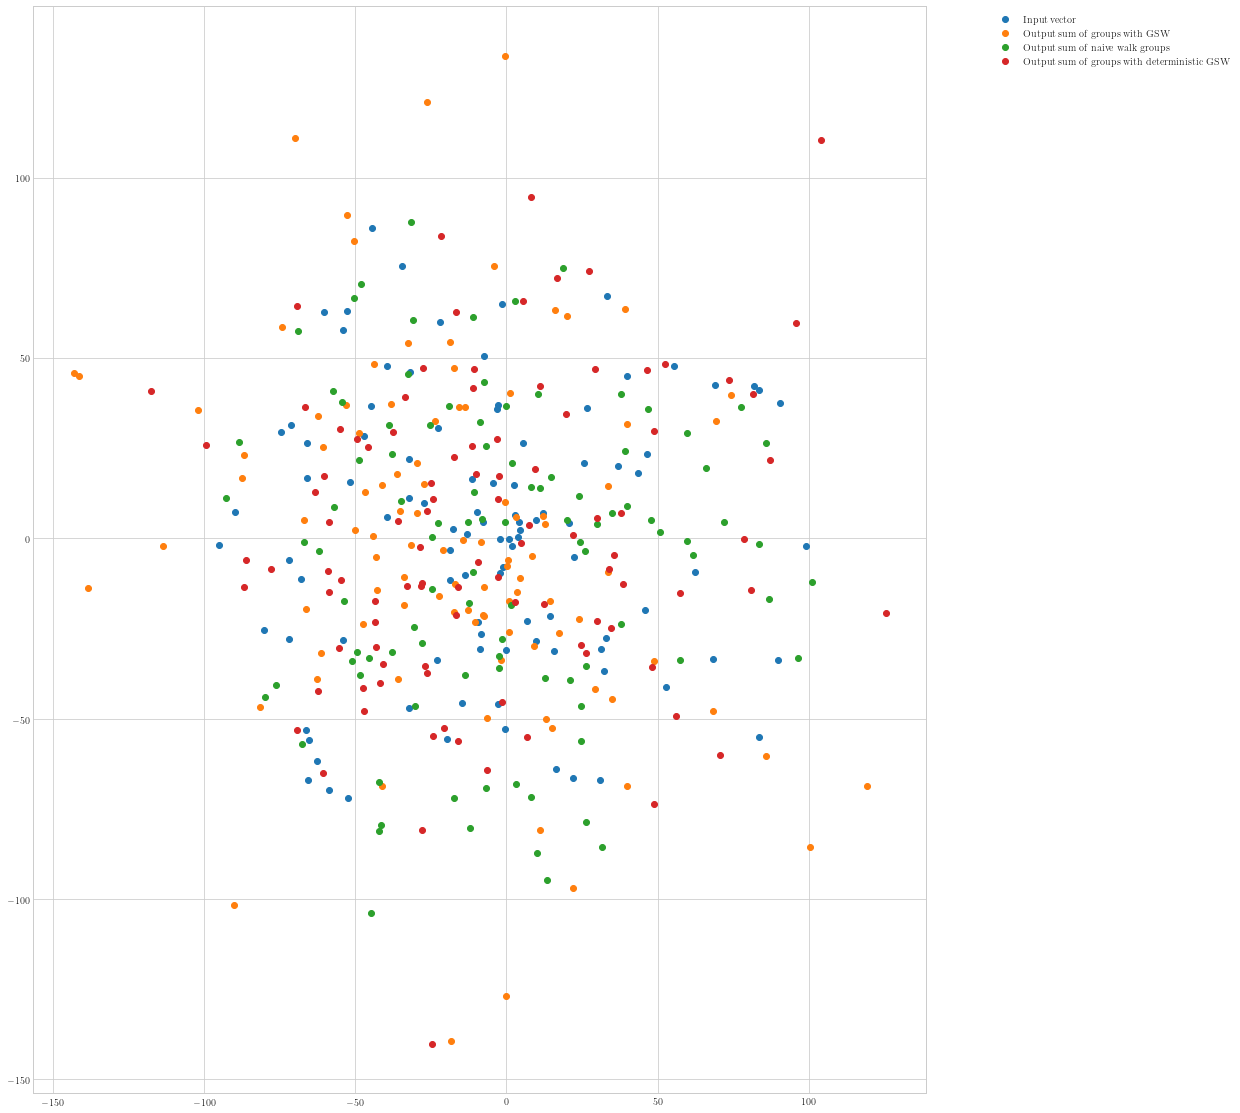

In [4]:
n=100
d=2
v=sample_from_ball(n,d=d)
for j in range(len(v)):
    v[j]=normalize(v[j])*(j+1)
plt.plot([e[0] for e in v],[e[1] for e in v],'o',label='Input vector')
B=np.transpose(np.vstack(tuple([e for e in v])))
gsw_xs=[]
naive_xs=[]
deterministic_gsw_xs=[]
for i in range(n):
    gsw_xs.append(gram_schmidt_walk(v,np.zeros(n),debug=False))
    deterministic_gsw_xs.append(gram_schmidt_walk(v,np.zeros(n),debug=False,smallest_delta=True))
    naive_xs.append(naive_walk(v))
plt.plot([np.matmul(B,x)[0] for x in gsw_xs],[np.matmul(B,x)[1] for x in gsw_xs],'o',label='Output sum of groups with GSW')
plt.plot([np.matmul(B,x)[0] for x in naive_xs],[np.matmul(B,x)[1] for x in naive_xs],'o',label='Output sum of naive walk groups')
plt.plot([np.matmul(B,x)[0] for x in deterministic_gsw_xs],[np.matmul(B,x)[1] for x in deterministic_gsw_xs],'o',label='Output sum of groups with deterministic GSW')
plt.legend()
plt.legend(bbox_to_anchor=(1.35, 1))
tikzplotlib.save(f"gsw_bad_{n}.tex")

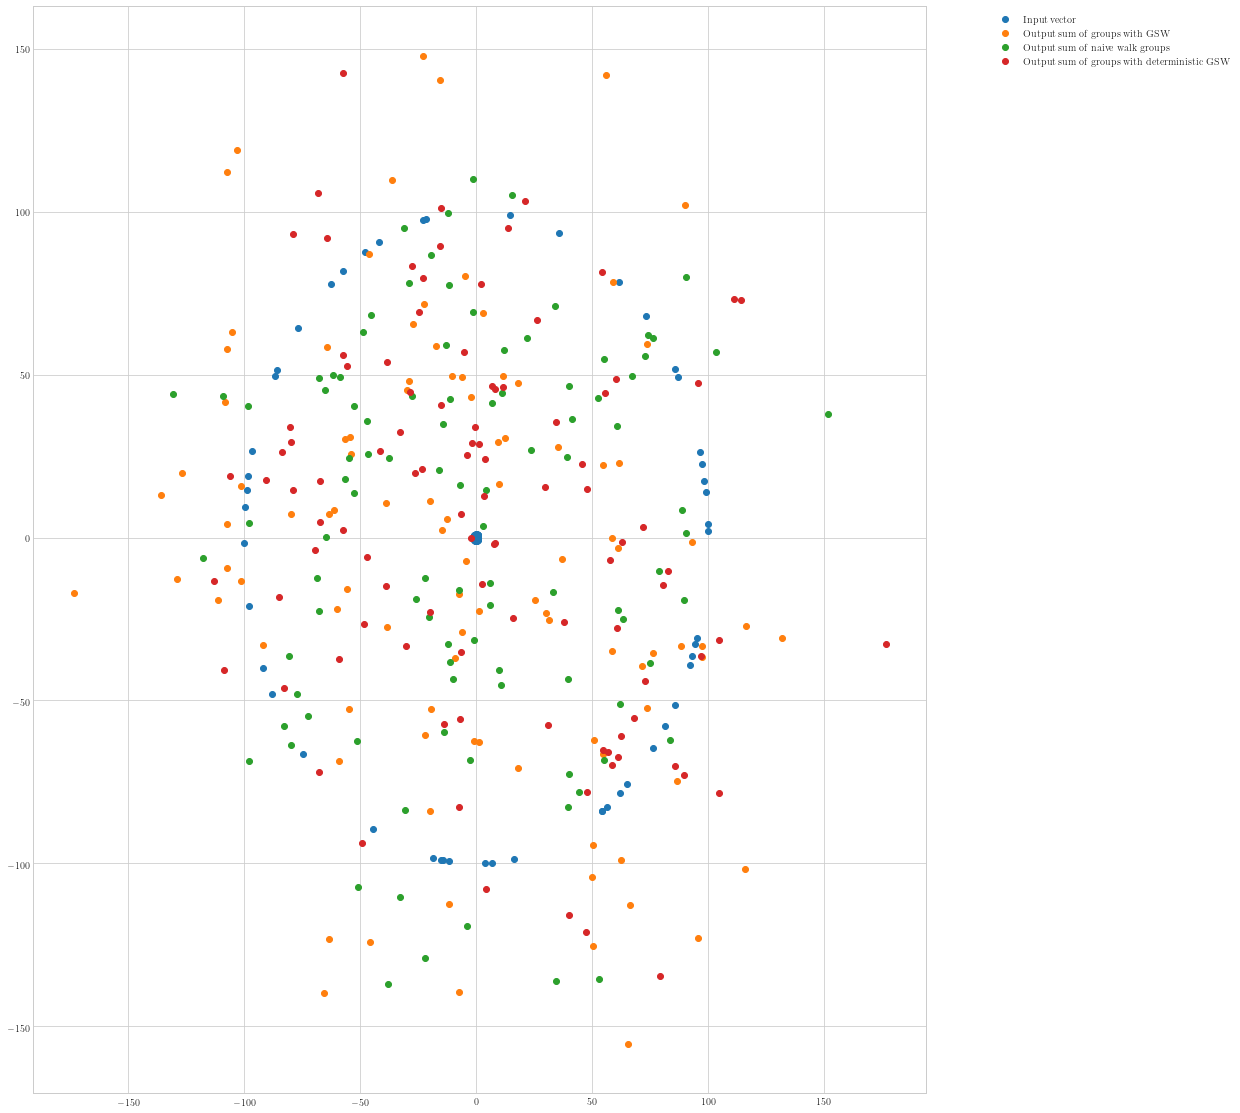

In [5]:
v=sample_from_ball(n,d=d)
for j in range(len(v)):
    v[j]=normalize(v[j])*(1 if j<n/2 else n)
plt.plot([e[0] for e in v],[e[1] for e in v],'o',label='Input vector')
B=np.transpose(np.vstack(tuple([e for e in v])))
gsw_xs=[]
naive_xs=[]
deterministic_gsw_xs=[]
for i in range(n):
    gsw_xs.append(gram_schmidt_walk(v,np.zeros(n),debug=False))
    deterministic_gsw_xs.append(gram_schmidt_walk(v,np.zeros(n),debug=False,smallest_delta=True))
    naive_xs.append(naive_walk(v))
plt.plot([np.matmul(B,x)[0] for x in gsw_xs],[np.matmul(B,x)[1] for x in gsw_xs],'o',label='Output sum of groups with GSW')
plt.plot([np.matmul(B,x)[0] for x in naive_xs],[np.matmul(B,x)[1] for x in naive_xs],'o',label='Output sum of naive walk groups')
plt.plot([np.matmul(B,x)[0] for x in deterministic_gsw_xs],[np.matmul(B,x)[1] for x in deterministic_gsw_xs],'o',label='Output sum of groups with deterministic GSW')
plt.legend()
plt.legend(bbox_to_anchor=(1.35, 1))
tikzplotlib.save(f"gsw_bad_{n}.tex")

In [24]:
v=[np.array([1,0])]*100+[10*normalize(np.array([1,1]))]*100
n=len(v)
d=len(v[0])
#plt.plot([e[0] for e in v],[e[1] for e in v],'o',label='Input vector')
B=np.transpose(np.vstack(tuple([e for e in v])))
gsw_xs=[]
naive_xs=[]
deterministic_gsw_xs=[]
for i in range(n):
    gsw_xs.append(np.round(gram_schmidt_walk(v,np.zeros(n),debug=False)))
    deterministic_gsw_xs.append(np.round(gram_schmidt_walk(v,np.zeros(n),debug=False,smallest_delta=True)))
    naive_xs.append(naive_walk(v))
print(f'Average norm of GSW vector of imbalances: {average([norm(np.matmul(B,x)) for x in gsw_xs])}')
print(f'Average norm of DGSW vector of imbalances: {average([norm(np.matmul(B,x)) for x in deterministic_gsw_xs])}')
print(f'Average norm of GSW vector of imbalances: {average([norm(np.matmul(B,x)) for x in naive_xs])}')

Average norm of GSW vector of imbalances: 6.85816385953074e-15
Average norm of DGSW vector of imbalances: 7.360593446309546e-15
Average norm of GSW vector of imbalances: 3.4700000000000015


Initializing a with -1s
Initializing b with 1s
Computing the list of elements that are alive with threshold 1e-12
x in basis: [0. 0. 0. 0. 0.]
a: [-1. -1. -1. -1. -1.]
b: [1. 1. 1. 1. 1.]
Choosing pivot through mode random.
x in basis: [0. 0. 0. 0. 0.]
Alive: [ True  True  True  True  True]
Pivot chosen: 4

 Iteration 0
Alive and not pivot: [ True  True  True  True False]
A_S:[[-2.52509462e-01 -1.23711061e-01  5.42284840e-01 -6.46165212e-01
   1.72914348e-01]
 [ 6.56056365e-02 -7.94790152e-01 -9.97542514e-02 -1.59630025e-01
  -1.24013082e-01]
 [ 1.00000000e-10  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  1.00000000e-10  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e-10  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e-10
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e-10]]
C_S:[[-3.27405744e-01  1.

C:\Users\Ga Bo\Desktop\Master Thesis\GSWalk\gsw.py:584: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sol=np.linalg.lstsq(m, i)



v_perp:[5.55111512e-17 0.00000000e+00 4.26782087e-09 1.00000000e-10
 2.01008064e-09 0.00000000e+00 0.00000000e+00]
v_perp-sum u_i*v_i:[5.74347960e-14 3.06149902e-14 2.21684404e-22 1.68538050e-23
 9.14034577e-23 1.59249681e-23 3.72164257e-24]
Calculated update direction u:[42.6782087   1.         20.10080639  0.          0.        ]
All deltas considered:[-0.01430334 -0.53744451 -0.07889142  0.03255898  1.46255549  0.02060707]
delta_+:0.020607072992347052
delta_-:-0.01430333905368952
delta=delta_-
Incurred discrepancy:1.074341573090826e-15
Computing the list of elements that are alive with threshold 1e-12
x in basis: [-1.         -0.47685883  0.29827257  1.          1.        ]
a: [-1. -1. -1. -1. -1.]
b: [1. 1. 1. 1. 1.]

in basis
x:[-1.         -0.47685883  0.29827257  1.          1.        ]
u:[42.6782087   1.         20.10080639  0.          0.        ]

 Iteration 3
Alive and not pivot: [False False  True False False]
indices to update: [0]
B_S:[[ 8.18078811e+19  1.91685367e+18  3

  -1.51907277e+09  1.20082603e+09  9.31391339e+09]]
update of C_S: [[ 3.19754226e+00 -3.23108683e-01  8.28607426e+09  1.38767747e+09
   0.00000000e+00 -3.50372190e+09  1.39889505e-06]
 [ 5.35495728e-01 -5.41113472e-02  1.38767747e+09  2.32395790e+08
   0.00000000e+00 -5.86771951e+08  2.34274409e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.35206353e+00  1.36624767e-01 -3.50372190e+09 -5.86771951e+08
   0.00000000e+00  1.48152995e+09 -5.91515243e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Time necessary to update C_S and D_S: 0.003079738000000276
Error in v_perp:[ 3.70120601e-13  1.42375001e-12  7.63594812e-07  5.34437867e-07
 -3.05450210e-07  4.58175314e-07  7.53882782e-08]
v_perp:[-2.01263022e-01 -7.74641023e-01  3.07124969e-11  1.00000000e-10
  0.00000000e+00  0.00000000e+00  0.00000000e+00]
v_perp-sum u_i*v_i:[ 8.76027371e-01

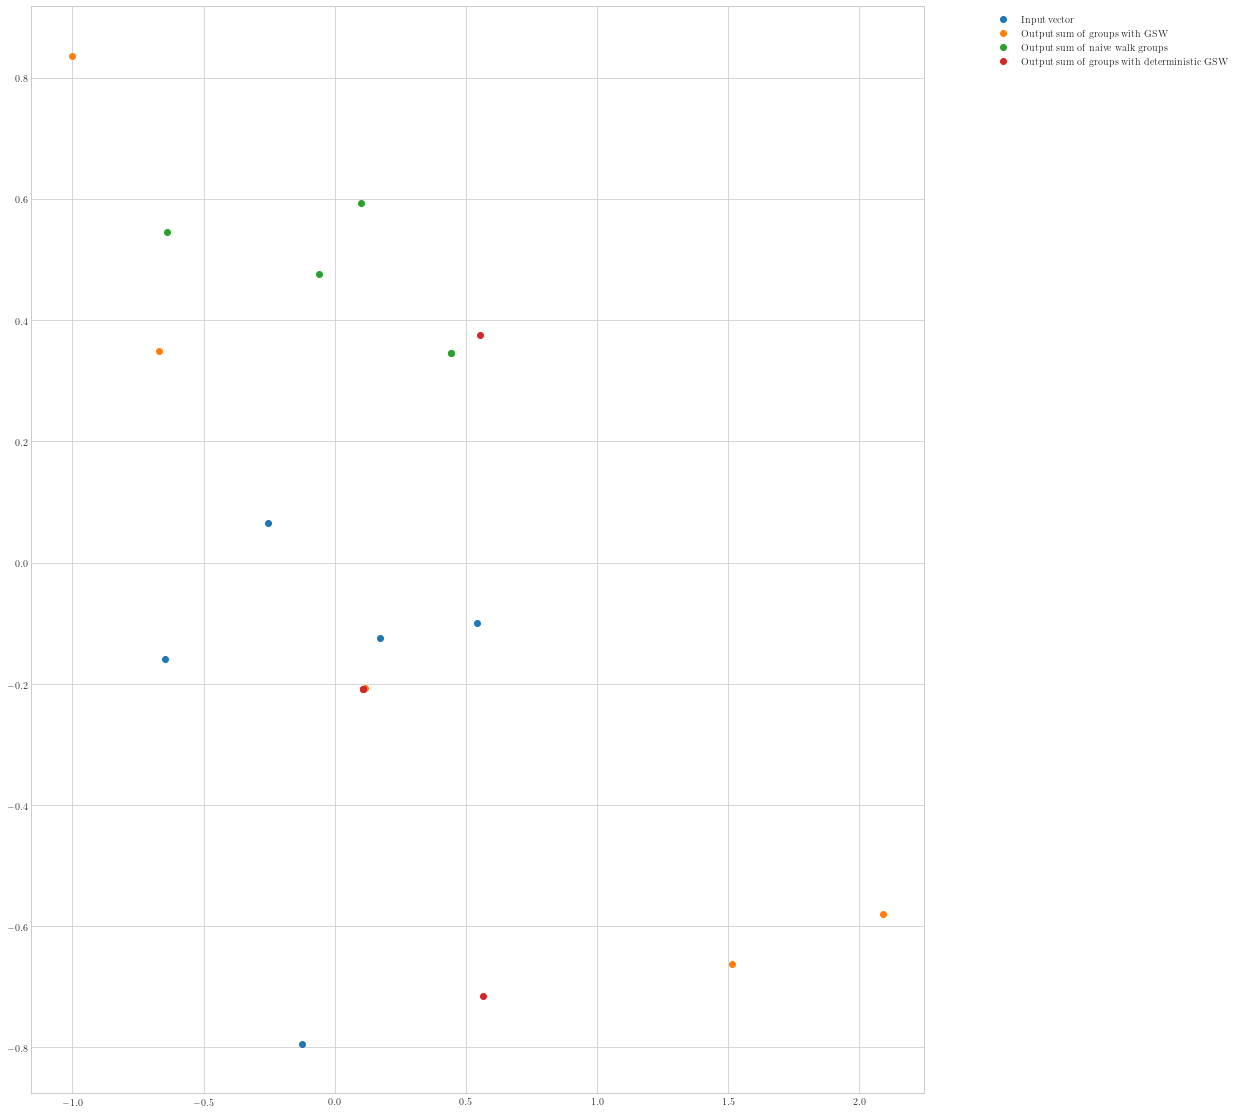

In [2]:
#Same as before with no_matrix_mult
n=5
d=2
v=sample_from_ball(n,d=d)
plt.plot([e[0] for e in v],[e[1] for e in v],'o',label='Input vector')
B=np.transpose(np.vstack(tuple([e for e in v])))
gsw_xs=[]
naive_xs=[]
deterministic_gsw_xs=[]
for i in range(n):
    gsw_xs.append(gram_schmidt_walk(v,np.zeros(n),debug=True,no_matrix_mult=True))
    deterministic_gsw_xs.append(gram_schmidt_walk(v,np.zeros(n),debug=True,smallest_delta=True,no_matrix_mult=True))
    naive_xs.append(naive_walk(v))
plt.plot([np.matmul(B,x)[0] for x in gsw_xs],[np.matmul(B,x)[1] for x in gsw_xs],'o',label='Output sum of groups with GSW')
plt.plot([np.matmul(B,x)[0] for x in naive_xs],[np.matmul(B,x)[1] for x in naive_xs],'o',label='Output sum of naive walk groups')
plt.plot([np.matmul(B,x)[0] for x in deterministic_gsw_xs],[np.matmul(B,x)[1] for x in deterministic_gsw_xs],'o',label='Output sum of groups with deterministic GSW')
plt.legend()
plt.legend(bbox_to_anchor=(1.35, 1))
tikzplotlib.save(f"gsw_bad_{n}.tex")